In [2]:
from pycaret.regression import setup, compare_models, evaluate_model, predict_model, save_model, load_model, plot_model, get_config, interpret_model

In [3]:
import pandas as pd
weather = pd.read_csv("C:/Users/nasut/OneDrive/Documents/Kuliah/Semester 7/PKKM/BMKG/Project/Data/data_fix_temp.txt")

In [4]:
weather.head()

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
1,2021-02-27 15:00:00,96001,0.0,0.0,0,27.3973,21.6059,70.8014,3.43326,12.4580,...,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2
2,2021-02-27 18:00:00,96001,0.0,0.0,0,27.0090,21.5161,72.0376,3.04901,27.2450,...,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0
3,2021-02-27 21:00:00,96001,0.0,0.0,0,26.5672,21.4226,73.5149,2.04556,37.3569,...,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6
4,2021-02-28 00:00:00,96001,0.0,0.0,0,26.4519,21.5400,74.5507,2.22508,20.1816,...,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8
5,2021-02-28 03:00:00,96001,0.0,0.0,0,26.7230,21.3691,72.6038,2.34268,14.7934,...,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4


In [5]:
weather.columns

Index(['Date', 'lokasi', 'con_prec.mm.', 'mic_prec.mm.', 'sha_prec.mm.',
       'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.', 'wdir.deg.',
       'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.', 'clmix.kg.kg.',
       'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.', 'cape.j.kg.',
       'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.', 'wd950.deg.',
       't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.', 't500.degC.',
       'rh500...', 'ws500.m.s.', 'wd500.deg.', 'hari', 'UTC', 'LAT', 'LON',
       'ELEV', 't_obs'],
      dtype='object')

In [6]:
weather.dtypes

Date             object
lokasi            int64
con_prec.mm.    float64
mic_prec.mm.    float64
sha_prec.mm.      int64
suhu2m.degC.    float64
dew2m.degC.     float64
rh2m...         float64
wspeed.m.s.     float64
wdir.deg.       float64
lcloud...       float64
mcloud...       float64
hcloud...       float64
surpre.Pa.      float64
clmix.kg.kg.    float64
wamix.kg.kg.    float64
outlr.W.m2.     float64
pblh.m.         float64
lifcl.m.        float64
cape.j.kg.      float64
mdbz            float64
t950.degC.      float64
rh950...        float64
ws950.m.s.      float64
wd950.deg.      float64
t800.degC.      float64
rh800...        float64
ws800.m.s.      float64
wd800.deg.      float64
t500.degC.      float64
rh500...        float64
ws500.m.s.      float64
wd500.deg.      float64
hari              int64
UTC               int64
LAT             float64
LON             float64
ELEV              int64
t_obs           float64
dtype: object

In [7]:
weather.agg(['nunique']).T

,nunique
Date,3886
lokasi,169
con_prec.mm.,304525
mic_prec.mm.,205022
sha_prec.mm.,1
suhu2m.degC.,122496
dew2m.degC.,90837
rh2m...,291107
wspeed.m.s.,369201
wdir.deg.,321537


In [8]:
weather_dropped = weather.drop(columns=['Date', 'UTC', 'LAT', 'LON','hari', 'sha_prec.mm.'])

In [9]:
setup??

Signature:
setup(
    data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    data_func: Union[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame]], NoneType] = None,
    target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1,
    index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True,
    train_size: float = 0.7,
    test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    ordinal_features: Union[Dict[str, list], NoneType] = None,
    numeric_features: Union[List[str], NoneType] = None,
    categorical_features: Union[List[str], NoneType] = None,
    date_features: Union[List[str], NoneType] = None,
    text_features: Union[List[str], NoneType] = None,
    ignore_features: Union[List[str], NoneType] = None,
    keep_featu

In [51]:
s = setup(weather_dropped, target='t_obs', train_size=0.9, n_jobs=5, use_gpu=True, normalize=True, normalize_method='minmax')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

,Description,Value
0,Session id,4045
1,Target,t_obs
2,Target type,Regression
3,Original data shape,"(544274, 33)"
4,Transformed data shape,"(544274, 33)"
5,Transformed train set shape,"(489846, 33)"
6,Transformed test set shape,"(54428, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

In [28]:
compare_models??

Signature:
compare_models(
    include: Union[List[Union[str, Any]], NoneType] = None,
    exclude: Union[List[str], NoneType] = None,
    fold: Union[int, Any, NoneType] = None,
    round: int = 4,
    cross_validation: bool = True,
    sort: str = 'R2',
    n_select: int = 1,
    budget_time: Union[float, NoneType] = None,
    turbo: bool = True,
    errors: str = 'ignore',
    fit_kwargs: Union[dict, NoneType] = None,
    groups: Union[str, Any, NoneType] = None,
    experiment_custom_tags: Union[Dict[str, Any], NoneType] = None,
    engine: Union[Dict[str, str], NoneType] = None,
    verbose: bool = True,
    parallel: Union[pycaret.internal.parallel.parallel_backend.ParallelBackend, NoneType] = None,
)
Source:   
@check_if_global_is_not_none(globals(), _CURRENT_EXPERIMENT_DECORATOR_DICT)
def compare_models(
    include: Optional[List[Union[str, Any]]] = None,
    exclude: Optional[List[str]] = None,
    fold: Optional[Union[int, Any]] = None,
    round: int = 4,
    cross_validati

In [52]:
from pycaret.regression import models
models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [53]:
best_model = compare_models(sort='MAE', include=['xgboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1.0672,1.9953,1.4125,0.7942,0.0501,0.0396,2.2320


In [54]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [55]:
train_data = get_config(variable='X_train')
test_data = get_config(variable='X_test')

In [56]:
train_data

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
540740,97980,0.005814,1.163790e-09,27.884899,23.698400,78.121498,4.57853,100.515999,0.772517,0.214240,...,100.317001,15.4934,76.999001,2.42667,91.696297,-5.02545,43.550301,7.91515,27.324301,0
493036,97700,0.555512,3.573120e-03,24.024599,22.601900,91.908600,3.27102,221.029007,0.946117,1.000000,...,175.643005,14.8956,96.815498,5.98352,137.914001,-4.70434,92.184601,1.86282,319.950989,10
189761,96633,0.139126,2.925150e-25,25.626600,24.206800,92.004700,1.38593,7.250430,0.833609,0.439993,...,47.842701,15.6652,81.332397,1.61713,47.382702,-5.54194,83.088898,2.42737,64.829102,3
169848,96583,0.098967,1.920850e-09,29.341101,24.408300,74.906700,3.98265,268.625000,0.302581,0.113212,...,260.016998,15.5631,77.008598,2.20081,235.123993,-4.98724,65.424797,2.81684,288.798004,2
459935,97530,0.000000,0.000000e+00,27.920601,23.928801,79.045998,1.55037,138.917007,0.538212,0.503478,...,26.572599,15.6845,86.871498,2.47439,171.216003,-4.48587,68.780403,5.45515,250.809006,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525171,97796,0.690281,1.592510e-29,24.190599,21.754101,86.419098,1.57184,337.856995,0.999655,0.671551,...,270.910004,15.2137,91.452599,1.45699,209.440002,-5.41520,81.312897,1.87519,281.919006,30
456673,97530,0.000000,9.611260e-09,27.485300,25.127001,87.107201,2.01758,74.448402,0.815820,0.525904,...,7.852430,15.8897,87.918503,1.54338,36.856201,-4.03140,67.972900,4.33663,261.796997,3
306684,96975,0.000000,0.000000e+00,28.214399,14.019900,41.857101,6.64545,131.593002,0.000000,0.000000,...,141.013000,14.4071,40.290699,5.79660,98.743103,-3.46465,3.678410,8.86016,80.381798,723
279224,96925,1.047270,5.432660e-02,26.256399,24.601000,90.749496,6.14946,287.506989,0.811893,0.550810,...,289.959015,15.1427,79.122002,13.93300,265.819000,-5.81993,91.224998,17.75370,257.623993,3


In [57]:
get_config(variable='X_train_transformed')

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
540740,0.495866,0.000163,1.019527e-11,0.685881,0.846904,0.715255,0.201227,0.279210,0.772517,0.214240,...,0.278654,0.436346,0.769989,0.075581,0.254494,0.465198,0.435503,0.311063,0.075593,0.000000
493036,0.425708,0.015536,3.130197e-05,0.525320,0.800079,0.894692,0.143717,0.613971,0.946117,1.000000,...,0.487896,0.386934,0.968155,0.186939,0.383003,0.504638,0.921846,0.070489,0.889494,0.006050
189761,0.158356,0.003891,2.562549e-27,0.591952,0.868615,0.895943,0.060803,0.020136,0.833609,0.439993,...,0.132890,0.450546,0.813323,0.050236,0.131280,0.401762,0.830889,0.092929,0.179908,0.001815
169848,0.145828,0.002768,1.682742e-11,0.746449,0.877220,0.673415,0.175017,0.746184,0.302581,0.113212,...,0.722271,0.442107,0.770085,0.068510,0.653297,0.469891,0.654248,0.108410,0.802846,0.001210
459935,0.383112,0.000000,0.000000e+00,0.687366,0.856743,0.727287,0.068036,0.385880,0.538212,0.503478,...,0.073805,0.452142,0.868714,0.077075,0.475600,0.531471,0.687804,0.213280,0.697185,0.001815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525171,0.449762,0.019305,1.395103e-31,0.532224,0.763874,0.823247,0.068980,0.938497,0.999655,0.671551,...,0.752530,0.413227,0.914525,0.045222,0.581883,0.417328,0.813129,0.070981,0.783713,0.018149
456673,0.383112,0.000000,8.419851e-11,0.669261,0.907912,0.832203,0.088585,0.206799,0.815820,0.525904,...,0.021804,0.469103,0.879184,0.047927,0.102011,0.587290,0.679729,0.168820,0.727746,0.001815
306684,0.244049,0.000000,0.000000e+00,0.699586,0.433588,0.243281,0.292138,0.365536,0.000000,0.000000,...,0.391700,0.346556,0.402903,0.181087,0.274088,0.656900,0.036784,0.348626,0.223165,0.437387
279224,0.231521,0.029289,4.759229e-04,0.618147,0.885449,0.879606,0.270323,0.798634,0.811893,0.550810,...,0.805445,0.407358,0.791219,0.435823,0.738645,0.367618,0.912250,0.702134,0.716140,0.001815


In [58]:
test_data

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
118202,96253,0.000000,0.000000,28.194099,24.231001,79.218002,4.006980,246.800003,0.286523,0.729432,...,274.799988,16.2812,33.492401,10.23160,291.230988,-4.81660,86.425301,1.11373,89.600601,24
36464,96071,0.000000,0.000000,22.928699,19.313700,80.227600,3.583880,277.243988,0.000000,0.840539,...,268.782990,15.7536,61.847801,6.57088,281.763000,-5.70017,83.679398,5.69596,109.777000,281
206630,96685,0.000000,0.000000,21.953300,21.775801,99.088303,0.509849,81.389297,0.580112,0.651262,...,118.695000,15.5169,86.436203,1.88435,84.767303,-4.62667,43.478500,5.92516,50.841801,32
467427,97600,0.035501,0.000000,27.251900,24.658600,85.875801,1.806730,37.496498,0.690914,0.574223,...,47.367001,14.7775,89.161598,3.82878,85.813797,-5.02877,56.860699,8.04782,93.059196,2
23703,96035,0.033382,0.000000,24.058901,21.580700,86.186996,2.049330,258.321014,0.873588,0.683331,...,295.481995,14.7434,91.611298,1.70422,135.408005,-6.82713,78.113602,5.52882,84.816902,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238733,96753,0.709774,0.000000,29.224001,23.965900,73.442101,3.581690,297.509003,0.388370,0.241681,...,289.468994,15.7348,68.183899,9.18816,253.462006,-4.89922,85.407204,4.94151,191.511993,207
299407,96945,2.074660,8.731030,20.980200,18.976400,88.484299,3.432180,248.942001,0.558253,0.577074,...,242.285004,16.0711,89.389397,5.94920,262.338989,-4.33931,72.627296,7.19992,296.468994,832
5379,96009,0.000000,0.000000,28.668800,22.452801,69.220100,5.258460,82.054901,0.068717,0.526527,...,82.180702,14.0193,87.815002,3.33410,86.170502,-5.99273,78.954597,6.97543,211.156998,28
356238,97124,0.019624,0.001329,19.550100,17.695700,89.206497,2.008670,249.210999,0.429504,0.356200,...,249.628998,15.5297,75.031303,2.27884,101.050003,-5.99214,78.255997,5.32364,277.937012,829


In [59]:
predict_model(best_model)

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,t_obs,prediction_label
118202,96253,0.000000,0.000000,28.194099,24.231001,79.218002,4.006980,246.800003,0.286523,0.729432,...,33.492401,10.23160,291.230988,-4.81660,86.425301,1.11373,89.600601,24,29.400000,29.703413
36464,96071,0.000000,0.000000,22.928699,19.313700,80.227600,3.583880,277.243988,0.000000,0.840539,...,61.847801,6.57088,281.763000,-5.70017,83.679398,5.69596,109.777000,281,25.100000,24.142845
206630,96685,0.000000,0.000000,21.953300,21.775801,99.088303,0.509849,81.389297,0.580112,0.651262,...,86.436203,1.88435,84.767303,-4.62667,43.478500,5.92516,50.841801,32,23.500000,24.628284
467427,97600,0.035501,0.000000,27.251900,24.658600,85.875801,1.806730,37.496498,0.690914,0.574223,...,89.161598,3.82878,85.813797,-5.02877,56.860699,8.04782,93.059196,2,25.799999,27.795246
23703,96035,0.033382,0.000000,24.058901,21.580700,86.186996,2.049330,258.321014,0.873588,0.683331,...,91.611298,1.70422,135.408005,-6.82713,78.113602,5.52882,84.816902,23,24.400000,24.444481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238733,96753,0.709774,0.000000,29.224001,23.965900,73.442101,3.581690,297.509003,0.388370,0.241681,...,68.183899,9.18816,253.462006,-4.89922,85.407204,4.94151,191.511993,207,30.700001,29.729713
299407,96945,2.074660,8.731030,20.980200,18.976400,88.484299,3.432180,248.942001,0.558253,0.577074,...,89.389397,5.94920,262.338989,-4.33931,72.627296,7.19992,296.468994,832,22.900000,23.431316
5379,96009,0.000000,0.000000,28.668800,22.452801,69.220100,5.258460,82.054901,0.068717,0.526527,...,87.815002,3.33410,86.170502,-5.99273,78.954597,6.97543,211.156998,28,29.600000,28.604958
356238,97124,0.019624,0.001329,19.550100,17.695700,89.206497,2.008670,249.210999,0.429504,0.356200,...,75.031303,2.27884,101.050003,-5.99214,78.255997,5.32364,277.937012,829,21.000000,21.044197


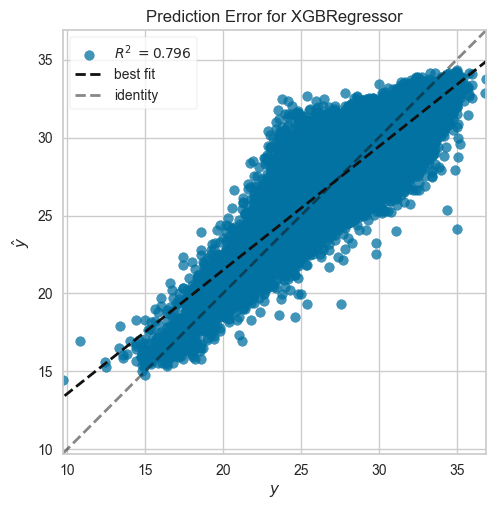

In [60]:
plot_model(best_model, plot='error')

In [61]:
best_model.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=5,
             num_parallel_tree=None, random_state=4045, ...)>

In [62]:
from pycaret.regression import tune_model
best_model_tuned = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0610,1.9948,1.4124,0.7920,0.0501,0.0393
1,1.0545,1.9707,1.4038,0.7971,0.0499,0.0391
2,1.0499,1.9509,1.3968,0.7991,0.0496,0.0389
3,1.0556,1.9672,1.4026,0.7976,0.0497,0.0391
4,1.0536,1.9460,1.3950,0.8020,0.0495,0.0391
5,1.0530,1.9604,1.4001,0.7982,0.0496,0.0390
6,1.0581,1.9773,1.4062,0.7963,0.0498,0.0392
7,1.0512,1.9521,1.3972,0.7964,0.0496,0.0390
8,1.0663,2.0063,1.4165,0.7925,0.0503,0.0396


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [63]:
predict_model(best_model_tuned)

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,t_obs,prediction_label
118202,96253,0.000000,0.000000,28.194099,24.231001,79.218002,4.006980,246.800003,0.286523,0.729432,...,33.492401,10.23160,291.230988,-4.81660,86.425301,1.11373,89.600601,24,29.400000,29.477739
36464,96071,0.000000,0.000000,22.928699,19.313700,80.227600,3.583880,277.243988,0.000000,0.840539,...,61.847801,6.57088,281.763000,-5.70017,83.679398,5.69596,109.777000,281,25.100000,24.650490
206630,96685,0.000000,0.000000,21.953300,21.775801,99.088303,0.509849,81.389297,0.580112,0.651262,...,86.436203,1.88435,84.767303,-4.62667,43.478500,5.92516,50.841801,32,23.500000,24.692240
467427,97600,0.035501,0.000000,27.251900,24.658600,85.875801,1.806730,37.496498,0.690914,0.574223,...,89.161598,3.82878,85.813797,-5.02877,56.860699,8.04782,93.059196,2,25.799999,27.971739
23703,96035,0.033382,0.000000,24.058901,21.580700,86.186996,2.049330,258.321014,0.873588,0.683331,...,91.611298,1.70422,135.408005,-6.82713,78.113602,5.52882,84.816902,23,24.400000,25.047693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238733,96753,0.709774,0.000000,29.224001,23.965900,73.442101,3.581690,297.509003,0.388370,0.241681,...,68.183899,9.18816,253.462006,-4.89922,85.407204,4.94151,191.511993,207,30.700001,29.645277
299407,96945,2.074660,8.731030,20.980200,18.976400,88.484299,3.432180,248.942001,0.558253,0.577074,...,89.389397,5.94920,262.338989,-4.33931,72.627296,7.19992,296.468994,832,22.900000,23.361412
5379,96009,0.000000,0.000000,28.668800,22.452801,69.220100,5.258460,82.054901,0.068717,0.526527,...,87.815002,3.33410,86.170502,-5.99273,78.954597,6.97543,211.156998,28,29.600000,28.026937
356238,97124,0.019624,0.001329,19.550100,17.695700,89.206497,2.008670,249.210999,0.429504,0.356200,...,75.031303,2.27884,101.050003,-5.99214,78.255997,5.32364,277.937012,829,21.000000,20.539577


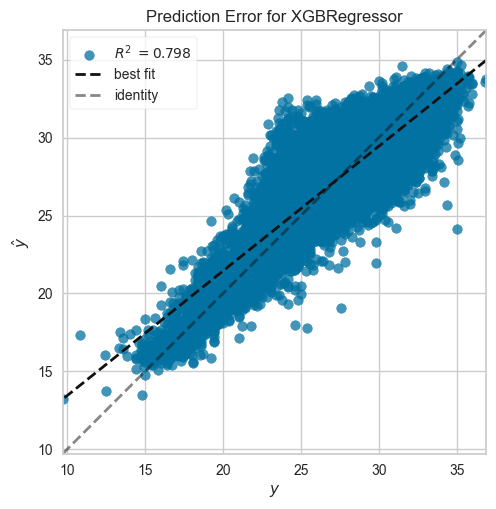

In [64]:
plot_model(best_model_tuned, plot='error')

In [65]:
best_model_tuned.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=5,
             num_parallel_tree=None, random_state=4045, ...)>

In [66]:
plot_model(best_model_tuned, plot='parameter')

,Parameters
objective,reg:squarederror
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,0.7
device,None
early_stopping_rounds,None
enable_categorical,False


In [27]:
save_model(best_model, 'xgboost_tuned_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['lokasi', 'con_prec.mm.',
                                              'mic_prec.mm.', 'sha_prec.mm.',
                                              'suhu2m.degC.', 'dew2m.degC.',
                                              'rh2m...', 'wspeed.m.s.',
                                              'wdir.deg.', 'lcloud...',
                                              'mcloud...', 'hcloud...',
                                              'surpre.Pa.', 'clmix.kg.kg.',
                                              'wamix.kg.kg.', 'outlr.W.m2.',
                                              'pblh.m.', 'lifcl.m.',
                                              'cape.j.kg.', 'mdbz', 't9...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_cons